No notebook anterior, nós aprendemos intuitivamente como o perceptron aprende. De maneira geral, nós vamos atualizando os pesos e o bias sempre buscando diminuir uma função de custo. Nesse notebook, nós vamos ver como esse aprendizado realmente acontence, tanto na teoria quanto na prática. Também utilizaremos o Perceptron para resolver problemas de classificação e regressão.

__Objetivos__:

- Implementar o perceptron e seu modelo de aprendizado em Python puro e Numpy
- Utilizar o perceptron para regressão e classificação

# Sumário

[Introdução](#Introdução)
- [Regra de Aprendizado do Perceptron](#Regra-de-Aprendizado-do-Perceptron)
- [Pseudo-algoritmo do Perceptron](#Pseudo-algoritmo-do-Perceptron)

[Classificação](#Classificação)
- [Porta AND/OR](#Porta-AND/OR)
- [Exercício de Classificação](#Exerc%C3%ADcio-de-Classificação)

[Regressão](#Regressão)
- [Exercício de Regressão](#Exerc%C3%ADcio-de-Regressão)

[Referências](#Referências)

# Imports e Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

# Introdução

O tipo mais básico de Rede Neural Artificial é formada por apenas um neurônio, o __Perceptron__. Inicialmente, o Perceptron foi projetado para ser um __classificador binário linear__ responsável por mapear uma ou mais entradas em uma saída desejada. Porém, também podemos utilizá-lo para resolver problemas de __regressão linear__. Ele foi projetado em 1957 por Frank Rosenblatt.

O perceptron é formado por:

<img src='images/perceptron.png' width='350'>

- __entradas__ $x_1,...,x_D$: representam os atributos dos seus dados com dimensionalidade $D$. O Perceptron aceita qualquer tamanho de entrada, porém a saída é sempre apenas um valor.
- __junção aditiva__ $\sum$: também chamada de _função agregadora_, nada mais é que a soma ponderada das entradas com os __pesos__ ($w_1,...,w_D)$. Em geral, o resultado é somado com um __bias__ $b$, responsável por deslocar o resultado do somatório. A junção aditiva é descrita pela seguinte fórmula:

$$\sum_i^D{x_iw_i} + b$$

- __função de ativação__ $f$: utilizada para mapear o resultado da junção aditiva em uma saída esperada. Mais detalhes abaixo.

Logo, o Perceptron é representado pela seguinte fórmula matemática:

$$\widehat{y}_i = f(\sum_i^D{x_iw_i} + b)$$

Onde:

- $D$: representa a dimensionalidade das amostras, ou seja, a quantidade de atributos de cada amostra.
- $x_i$: representam os atributos de uma amostra que servem de entrada para o Perceptron.
- $w_i$: representam os __pesos sinápticos__ que ponderam as entradas.
- $b$: representa o __bias__, responsável por deslocar a fronteira de decisão além da origem e não depende de nenhum valor de entrada. Repare que o bias encontra-se fora do somatório.
- $f$: __função de ativação__. Quando a função de ativação é linear, ou seja, nenhuma transformação é aplicada no resultado da junção aditiva, o Perceptron atua como um __Regressor Linear__. Se precisamos efetuar uma __Classificação binária__, devemos utilizar a função _step_ (também conhecida como _função degrau_) para mapear a saída em um valor discreto (0 ou 1):

$$f = \begin{cases}1 & se \ wx+b > 0\\0 & caso \ contr\acute ario\end{cases}$$

- $\widehat{y}$: representa a saída do Perceptron (o valor predito).

__Observações importantes__:

- O Perceptron não faz __Classificação Multiclasse__.
- __A atualização dos pesos é *online*, ou seja, efetuada amostra a amostra__ utilizando uma fórmula pré-definida que veremos na seção a seguir.

## Regra de Aprendizado do Perceptron

O Perceptron tem sua própria forma de aprendizado conforme definido no seu artigo original. Na verdade, a fórmula para atualização dos pesos e bias é bem simples:

$$w_i = w_i + \lambda(y_i - \widehat{y}_i)x_i$$
<br>
$$b_i = b_i + \lambda(y_i - \widehat{y}_i)$$

Onde $\lambda$ é a __taxa de aprendizagem__ (___learning rate___).

Repare que $y_i - \widehat{y}_i$ significa calcular a diferença entre o valor esperado ($y_i$) e o valor predito ($\widehat{y}_i$). Supondo que estamos fazendo __classificação binária__ de uma amostra $(x_i, y_i)$. Nesse caso, teremos duas possibilidades:
- __O valor esperado é $y_i = \widehat{y}_i$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __igual__ a saída esperada. Nesse caso, __a diferença $y_i - \widehat{y}_i = 0$ e não haverá atualização de pesos__.
- __O valor esperado é $y_i \neq \widehat{y}_i$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __diferente__ da saída esperada. Nesse caso, __a atualização dos pesos será dada pela diferença $y_i - \widehat{y}_i$__. Repare que:
    - quando essa diferença é __negativa__ (ou seja, $y_i = 0$ e $\widehat{y}_i = 1$), __os pesos tendem a diminuir__.
    - quando essa diferença é __positiva__ (ou seja, $y_i = 1$ e $\widehat{y}_i = 0$), __os pesos tendem a aumentar__.

## Pseudo-algoritmo do Perceptron

1. Inicialize os pesos $w$ e o bias $b$
2. Para cada amostra $(x_n, y_n)$ do nosso banco:
    1. Calcule $\widehat{y} = f(\sum_i^D{x_iw_i} + b)$, onde $f$ é a __função _step_ para classificação__ e __linear no caso da regressão__
    2. Calcule o $erro = y_n - \widehat{y}$
    3. Atualize os pesos $w_i = w_i + \lambda*erro*x_i$
    4. Atualize o bias $b_i = b_i + \lambda*erro$
3. Repita o passo 2 por N vezes ou até que alguma medida de custo para o $erro$ seja menor que um valor pré-determinado.
    
Repare, como dito lá em cima, que __a atualização dos pesos e bias é feito a cada amostra__, e não somente após ver todas as amostras do banco.

# Classificação

## Porta AND/OR

In [22]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#y = np.array([0, 1, 1, 1]) # porta OR
y = np.array([0, 0, 0, 1]).T # porta AND

print(x.shape, y.shape)

(4, 2) (4,)


### Python

In [26]:
D = len(x)
w = [2 * random() - 1 for _ in range(D)]
b = 2 * random() -1 

learning_rating = 1 # 0.1

for step in range(101):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i * w_i for x_i, w_i in zip(x_n, w)]) + b
        y_pred = 1 if y_pred > 0 else 0
        erro = y_n - y_pred
        w = [w_i + learning_rating * erro * x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rating * erro
        cost += erro**2

    if step % 10 == 0:
        print(f'Step {step} erro: {cost}')

print('')
print(f'w: {w}')
print(f'b: {b}')
print(f'y_pred: {np.dot(x, np.array(w)) + b}')


Step 0 erro: 3
Step 10 erro: 0
Step 20 erro: 0
Step 30 erro: 0
Step 40 erro: 0
Step 50 erro: 0
Step 60 erro: 0
Step 70 erro: 0
Step 80 erro: 0
Step 90 erro: 0
Step 100 erro: 0

w: [2.546722909741027, 1.5963716527768241]
b: -3.316911178100223
y_pred: [-3.31691118 -1.72053953 -0.77018827  0.82618338]


### Numpy

In [35]:
D = x.shape[1]
w = 2 * np.random.random(size=D) - 1
b = 2 * np.random.random() - 1

learning_rating = 1e-2

for step in range(101):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b
        y_pred = np.where(y_pred > 0, 1, 0)
        erro = y_n - y_pred
        w = w + learning_rating * np.dot(erro, x_n)
        b = b + learning_rating * erro
        cost += erro

    if step % 10 == 0:
        print(f'Step {step} erro: {cost}')

print('')
print(f'w: {w}')
print(f'b: {b}')
print(f'y_pred: {np.dot(x, np.array(w)) + b}')


Step 0 erro: -1
Step 10 erro: -1
Step 20 erro: -1
Step 30 erro: -1
Step 40 erro: -1
Step 50 erro: -1
Step 60 erro: 0
Step 70 erro: 0
Step 80 erro: 0
Step 90 erro: -1
Step 100 erro: 0

w: [0.02058279 0.01370727]
b: -0.02595043853056117
y_pred: [-0.02595044 -0.01224317 -0.00536765  0.00833962]


## Exercício de Classificação

(100, 2) (100,)


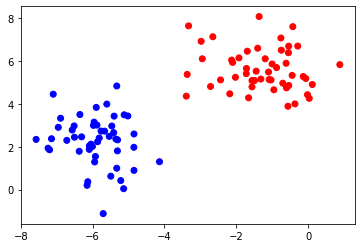

In [36]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

In [37]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

### Python

Step 0 erro: 8
Step 10 erro: 0
Step 20 erro: 0
Step 30 erro: 0
Step 40 erro: 0
Step 50 erro: 0
Step 60 erro: 0
Step 70 erro: 0
Step 80 erro: 0
Step 90 erro: 0
Step 100 erro: 0

w: [13.594830605147827, 13.305130222415105]
b: 0.3607483449734985
y_pred: [ 59.13582153 -22.18809413 -64.95338456  89.18577647  63.20344066
 -53.641464    53.89487235 -22.86260806  48.5044449   44.42183108
 -31.02962957  26.05624293 -65.20113167 -37.88670437 -54.50633391
 -62.503306    65.15136138  77.82926668 -38.76368757  51.75554148
 -72.3639749   55.88456586  58.96636237  49.29336578 -41.02749837
  51.05085255 -49.60792477  70.39322633  50.6835153   56.76451914
  30.12375952  42.82053118 -66.01234651 -51.93952458 -60.39805062
  56.69714531  65.25717841  34.75828615 -22.76429788 -40.3784651
 -72.77381217 -58.82392524 -53.61998144  64.63260705 -59.58870086
  57.60104043  35.2360372   52.16521629 -40.90296003  85.45987485
  58.29546773 -55.53414608 -78.13710968 -38.61775184 -49.01306931
  81.9872662   68.635443

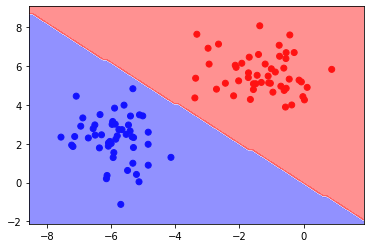

In [39]:
D = len(x)
w = [2 * random() - 1 for _ in range(D)]
b = 2 * random() -1 

learning_rating = 1 # 0.1

for step in range(101):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i * w_i for x_i, w_i in zip(x_n, w)]) + b
        y_pred = 1 if y_pred > 0 else 0
        erro = y_n - y_pred
        w = [w_i + learning_rating * erro * x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rating * erro
        cost += erro**2

    if step % 10 == 0:
        print(f'Step {step} erro: {cost}')

print('')
print(f'w: {w}')
print(f'b: {b}')
print(f'y_pred: {np.dot(x, np.array(w)) + b}')

plot_linear_classifier(x, y, w, b)

### Numpy

Step 0 erro: 8
Step 10 erro: 0
Step 20 erro: 0
Step 30 erro: 0
Step 40 erro: 0
Step 50 erro: 0
Step 60 erro: 0
Step 70 erro: 0
Step 80 erro: 0
Step 90 erro: 0
Step 100 erro: 0

w: [0.05548418 0.04320886]
b: 0.08524306934030382
y_pred: [ 0.24602535 -0.04487949 -0.18599083  0.35820908  0.2701011  -0.14508577
  0.24675992 -0.0482313   0.23739791  0.2219313  -0.07165368  0.13050334
 -0.20864335 -0.10033409 -0.16100428 -0.19113648  0.29057478  0.33057548
 -0.10934278  0.22798234 -0.2329789   0.24370185  0.2753302   0.23330548
 -0.11690384  0.23492139 -0.14347072  0.30568624  0.22480751  0.26038387
  0.15714943  0.20538677 -0.19257823 -0.15904267 -0.18821675  0.23044542
  0.28241342  0.1781355  -0.05337345 -0.11128045 -0.23384358 -0.16735824
 -0.15857713  0.28256682 -0.1765657   0.26497952  0.17083455  0.2339905
 -0.10890192  0.35828469  0.26085474 -0.16999361 -0.23920123 -0.08825454
 -0.15319711  0.34415585  0.3053682   0.38984053  0.25666226  0.29221985
  0.30330124 -0.00153883  0.14226604

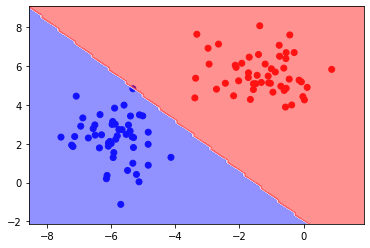

In [40]:
D = x.shape[1]
w = 2 * np.random.random(size=D) - 1
b = 2 * np.random.random() - 1

learning_rating = 1e-2

for step in range(101):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b
        y_pred = np.where(y_pred > 0, 1, 0)
        erro = y_n - y_pred
        w = w + learning_rating * np.dot(erro, x_n)
        b = b + learning_rating * erro
        cost += erro

    if step % 10 == 0:
        print(f'Step {step} erro: {cost}')

print('')
print(f'w: {w}')
print(f'b: {b}')
print(f'y_pred: {np.dot(x, np.array(w)) + b}')

plot_linear_classifier(x, y, w, b)

# Regressão 

Para transformar o Perceptron em um __regressor linear__, só o que temos de fazer é __remover a função de ativação _step___, transformando-a em uma função de ativação linear.

Apesar dessa modificação, __a fórmula de atualização dos pesos não sofre nenhuma alteração__. 

Vamos, então, implementar nosso perceptron para classificação em Python, Numpy, Keras e TensorFlow:

In [ ]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

In [ ]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [ ]:
print(x.shape, y.shape)

In [ ]:
x = x.reshape(-1, 1)

print(x.shape, y.shape)

### Python

__Exercício__: tentar estimar as learning_rates de **w** e __b__. Elas são diferentes por que nossos dados não estão na mesma escala!

In [ ]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        # qual linha devemos remover para transformar o Perceptron num regressor?
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        y_pred = 1 if y_pred > 0 else 0
        error = y_n - y_pred
        w = [w_i + 1.0*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + 1.0*error
        cost += error**2

    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

### Numpy 

In [ ]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1 

for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        # qual linha devemos remover para transformar o Perceptron num regressor?
        y_pred = np.dot(x_n, w) + b 
        y_pred = np.where(y_pred > 0, 1, 0)
        error = y_n - y_pred
        w = w + 1.0*np.dot(error, x_n)
        b = b + 1.0*error
        cost += error**2
    
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

### Numpy com Pré-processamento

In [ ]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

In [ ]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

In [ ]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1 

learning_rate = 1.0 # <- tente estimar a learning_rate

for step in range(1001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2
    
    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

## Exercício de Regressão

In [ ]:
df = pd.read_csv('data/notas.csv')

print(df.shape)
df.head(10)

In [ ]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.scatter(df.prova1.values, df.final.values)
plt.xlabel('Prova 1')
plt.ylabel('Final')

plt.subplot(1, 3, 2)
plt.scatter(df.prova2.values, df.final.values)
plt.xlabel('Prova 2')
plt.ylabel('Final')

plt.subplot(1, 3, 3)
plt.scatter(df.prova3.values, df.final.values)
plt.xlabel('Prova 3')
plt.ylabel('Final')

In [ ]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values

print(x.shape, y.shape)

In [ ]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [ ]:
reg = LinearRegression()
reg.fit(x, y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

### Python

In [ ]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

learning_rate = 1.0 # <- tente estimar a learning_rate

for step in range(1): # <- tente estimar o número de passos
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

### Numpy

In [ ]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1       

learning_rate = 1.0 # <- tente estimar a learning_rate

for step in range(1): # <- tente estimar o número de passos
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2
    
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

# Referências

- [Artigo original do Perceptron](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.335.3398&rep=rep1&type=pdf)